In [17]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer, AerSimulator, StatevectorSimulator, QasmSimulator
from qiskit.visualization import plot_histogram, plot_bloch_multivector
import numpy as np
import matplotlib.pyplot as plt

In [18]:
# Step 1: Create a quantum circuit with 3 qubits (representing 3 magnetic dipoles in a material)
qc = QuantumCircuit(3)



In [19]:
# Step 2: Initialize the qubits in a random superposition state (representing random dipole orientations)
for qubit in range(3):
    qc.h(qubit)  # Hadamard gate puts each qubit into superposition



In [20]:
# Step 3: Apply a Pauli-Z gate to align the qubits with an external magnetic field (representing magnetic dipole alignment)
# The Pauli-Z gate simulates the effect of a magnetic field aligning the dipoles
for qubit in range(3):
    qc.z(qubit)



In [21]:
# Step 4: Apply another Pauli-X gate to simulate the re-orientation of dipoles opposing the external field (Lenz’s law)
# This models dipoles opposing the field, simulating hysteresis in the material
for qubit in range(3):
    qc.x(qubit)



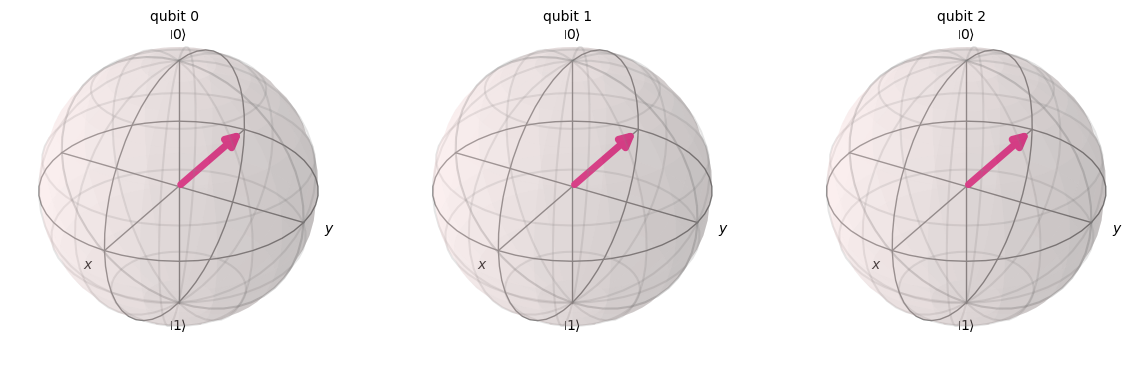

In [22]:
# Step 5: Visualize the qubit's state on the Bloch sphere to observe the alignment of the dipoles

final_state = StatevectorSimulator().run(qc).result().get_statevector()


plot_bloch_multivector(final_state)



In [23]:
# Step 6: Measure the qubits to observe their final state (representing the magnetized state of the material)
qc.measure_all()



In [24]:
# Step 7: Simulate the measurement and plot the results
result = QasmSimulator().run(qc,shot =2048).result()
counts = result.get_counts(qc)



Measurement results: {'101': 128, '100': 148, '001': 130, '011': 128, '111': 118, '110': 134, '010': 126, '000': 112}


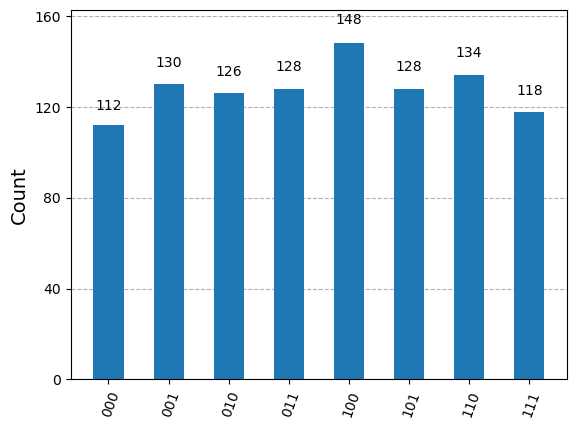

In [25]:
# Print the measurement results and plot the histogram
print(f"Measurement results: {counts}")
plot_histogram(counts)



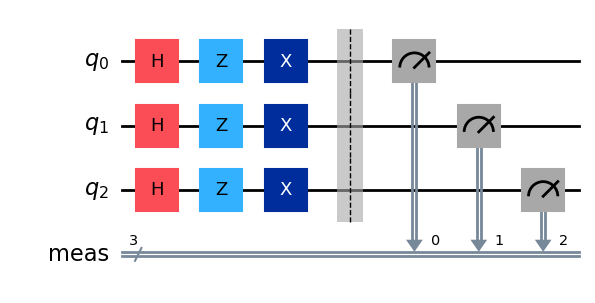

In [26]:
# Draw the quantum circuit
qc.draw(output='mpl')